# Question 1: How are income, race, and pollution relevant to EV charger number? Can we use demographic characteristics to predict where future EV chargers will be built?


To answer this question, we need data from the U.S. Census, CalEnviroScreen, and NREL. 

Variables of interest:
- Median household income: B19013_001E
- Units in housing: DP04_0006E to DP04_00013E

In [1]:
import pandas as pd
import geopandas as gpd
import requests, json
#https://api.census.gov/data/2017/acs/acs5/profile/groups/DP04.html

# requestString = "https://api.census.gov/data/2020/acs/acs5/profile?get=NAME,DP04_0006E,DP04_0007E,DP04_0008E,DP04_0009E,DP04_0010E,DP04_0011E,DP04_0012E,DP04_0013E&for=tract:*&in=state:06"
# r = requests.get(requestString)
# d=json.loads(r.text)
# unitsHousingDf = pd.DataFrame(d[1:], columns = d[0])
# unitsHousingDf.head()

First we get median household income data from U.S. Census via an API request.

In [19]:
#have to make a different request bc this variable isn't in the "profiles" subsection
rs2 = "https://api.census.gov/data/2020/acs/acs5?get=NAME,B19013_001E&for=tract:*&in=state:06"
r2 = requests.get(rs2)
d2=json.loads(r2.text)
IncomeDf = pd.DataFrame(d2[1:], columns = d2[0])

In [20]:
IncomeDf.head()

,NAME,B19013_001E,state,county,tract
0,"Census Tract 3131.02, Contra Costa County, Cal...",78856,06,013,313102
1,"Census Tract 3131.04, Contra Costa County, Cal...",48316,06,013,313104
2,"Census Tract 3131.05, Contra Costa County, Cal...",62422,06,013,313105
3,"Census Tract 3131.06, Contra Costa County, Cal...",130091,06,013,313106
4,"Census Tract 3131.07, Contra Costa County, Cal...",122727,06,013,313107


We create a GEOID column by combining the 'state', 'county', and 'tract' column in preparation for a tabular join.

In [3]:
#creating GEOID for each tract
columns = ['tract', 'county', 'state']
for i in columns:
    #unitsHousingDf[i] = unitsHousingDf[i].astype(str)
    IncomeDf[i] = IncomeDf[i].astype(str)
#unitsHousingDf['GEOID'] = unitsHousingDf['state'] + unitsHousingDf['county'] + unitsHousingDf['tract']
#unitsHousingDf['GEOID'] = unitsHousingDf['GEOID'].astype(int)
IncomeDf['GEOID'] = IncomeDf['state'] + IncomeDf['county'] + IncomeDf['tract']
IncomeDf['GEOID'] = IncomeDf['GEOID'].astype(int)


In [111]:
#unitsHousingDf.sort_values(by = 'GEOID', ascending = False).head()

,NAME,DP04_0006E,DP04_0007E,DP04_0008E,DP04_0009E,DP04_0010E,DP04_0011E,DP04_0012E,DP04_0013E,state,county,tract,GEOID
1705,"Census Tract 9901, Ventura County, California",0,0,0,0,0,0,0,0,06,111,990100,6111990100
1704,"Census Tract 9800, Ventura County, California",0,0,0,0,0,0,0,0,06,111,980000,6111980000
8534,"Census Tract 9852.02, Tuolumne County, California",0,0,0,0,0,0,0,0,06,109,985202,6109985202
5077,"Census Tract 9901, Sonoma County, California",0,0,0,0,0,0,0,0,06,097,990100,6097990100
5076,"Census Tract 1543.08, Sonoma County, California",1254,1184,19,12,0,0,16,0,06,097,154308,6097154308


In [112]:
#now let's join the two together
#censusDf = unitsHousingDf.join(IncomeDf, how = 'outer', on = "GEOID", rsuffix = '_remove')

In [58]:
censusDf.reset_index(inplace = True)
# censusDf['tract'] = censusDf['tract'].astype(str)
# censusDf['DP04_0007E'] = censusDf['DP04_0007E'].astype(int)
# censusDf['DP04_0008E'] = censusDf['DP04_0008E'].astype(int)
# censusDf['DP04_0009E'] = censusDf['DP04_0009E'].astype(int)
# censusDf['DP04_0010E'] = censusDf['DP04_0010E'].astype(int)
# censusDf['DP04_0011E'] = censusDf['DP04_0011E'].astype(int)
# censusDf['DP04_0012E'] = censusDf['DP04_0012E'].astype(int)
# censusDf['DP04_0013E'] = censusDf['DP04_0013E'].astype(int)
censusDf['B19013_001E'] = censusDf['B19013_001E'].astype(int)
censusDf['B19013_001E'] = censusDf['B19013_001E'].astype(int)
# censusDf['state'] = censusDf['state'].astype(str)
# censusDf['county'] = censusDf['county'].astype(str)

In [61]:
# censusDf['county'] = censusDf['county'].apply(lambda x: x[1:])
# censusDf['state'] = censusDf['state'].apply(lambda x: x[1:])
censusDf['GEOID'] = censusDf['GEOID'].apply(lambda x: x[1:])
censusDf['GEOID'] = censusDf['GEOID'].astype(int)

Here we create a geodataframe for CalEnviroscreen by reading a shapefile. 

In [5]:
#CalEnviroScreen
CalEnviroScreenGdf = gpd.read_file('CES4/CES4 Final Shapefile.shp')
CalEnviroScreenGdf['Tract'] = CalEnviroScreenGdf['Tract'].astype(int)

CalEnviroScreen provides an abudnace of pollution indicators, which we will use for predictive modeling.

In [6]:
CalEnviroScreenGdf.sort_values(by = 'Tract',ascending=False).head()

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
1968,6115041100,95925,Yuba,Unincorporated Yuba County area,4122,11.689990,17.007060,0.056966,75.357810,5.986024,...,30.4464,9.4857,79.1363,3.0082,0.9704,6.9869,144039.617460,5.764054e+08,0.4124,"POLYGON ((-87348.800 176015.430, -87962.302 17..."
1972,6115041000,95901,Yuba,Unincorporated Yuba County area,7298,21.987095,42.133132,0.051297,64.866210,7.613826,...,21.6635,12.8939,77.8706,4.0285,0.0822,2.9871,131718.383809,4.756319e+08,2.1376,"POLYGON ((-118015.890 150723.763, -118020.386 ..."
1975,6115040902,95901,Yuba,Unincorporated Yuba County area,1653,18.665993,34.430156,0.049630,59.962663,7.449359,...,0.0000,19.7822,56.3823,8.5904,0.1815,6.5941,49095.486666,1.025559e+08,8.4694,"POLYGON ((-114108.120 127146.968, -114190.344 ..."
1976,6115040901,95901,Yuba,Unincorporated Yuba County area,2720,30.214329,59.127584,0.050254,62.551338,7.609393,...,20.6985,17.5000,63.4191,0.7353,1.1029,6.8382,134249.951236,2.590743e+08,10.4044,"POLYGON ((-112857.633 134628.595, -112795.165 ..."
1969,6115040800,95692,Yuba,Unincorporated Yuba County area,4652,21.593886,41.275845,0.049200,58.357187,7.784847,...,13.9940,15.8212,75.0645,0.1505,0.9888,5.3740,52067.530151,1.089667e+08,2.6010,"POLYGON ((-118271.694 119288.740, -117977.343 ..."


In [7]:
tractsDf = CalEnviroScreenGdf.set_index('Tract').join(IncomeDf.set_index('GEOID'), how='left')

[]

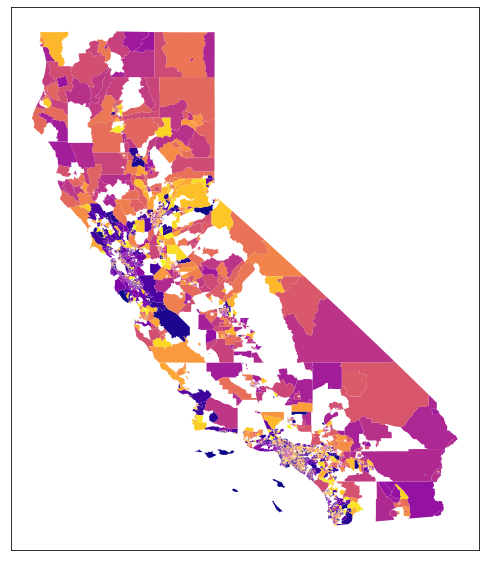

In [9]:
import contextily as ctx
import matplotlib.pyplot as plt

# Create blank figure and axes objects
fig, ax = plt.subplots(figsize=(10,10))
# Plot the data. ax=ax means we plot it on the axes that we just created
tractsDf.to_crs('EPSG:3857').plot(column = 'B19013_001E', cmap='plasma', ax=ax) 


#  set axis ticks and labels to empty lists
ax.set_xticks([])
ax.set_yticks([])

Now let's get the EV data and subset it to just chargers in California.

In [ ]:
#have to run this to fix my geopandas for some reason; if yours works don't run it
##solution from https://gis.stackexchange.com/questions/375361/zonal-stats-returns-proj-error
import os
import pyproj as p
os.environ['PROJ_LIB'] = '/Users/hfrahn/opt/anaconda3/envs/uds/bin/pyproj'
p.datadir.set_data_dir('/Users/hfrahn/opt/anaconda3/envs/uds/bin/pyproj')

In [10]:
#request chargers from NREL 
apiKey = "eCN7llpPT79TmygqmvC71QdnnWdOquoRdnCR1DXo"
requestString = "https://developer.nrel.gov/api/alt-fuel-stations/v1.geojson?api_key={}&fuel_type=ELEC&state=CA".format(apiKey)
chargers = gpd.read_file(requestString)

In [17]:
chargers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
chargers.describe()

,id,ev_dc_fast_num,ev_level1_evse_num,ev_level2_evse_num
count,14838.000000,1725.000000,129.000000,13388.000000
mean,165899.490497,4.326957,4.651163,2.577308
std,38251.459209,5.754732,10.209257,5.184322
min,1517.000000,1.000000,1.000000,1.000000
25%,159149.250000,1.000000,1.000000,1.000000
50%,176906.500000,2.000000,1.000000,2.000000
75%,186784.750000,4.000000,2.000000,2.000000
max,220789.000000,56.000000,54.000000,311.000000


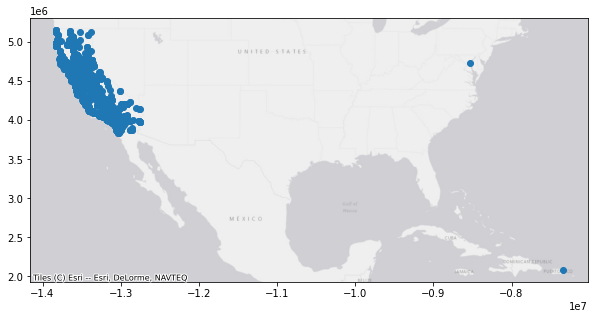

In [ ]:
# now let's plot them just to make sure they are in CA
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
chargers.to_crs("EPSG:3857").plot(ax=ax)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldGrayCanvas)

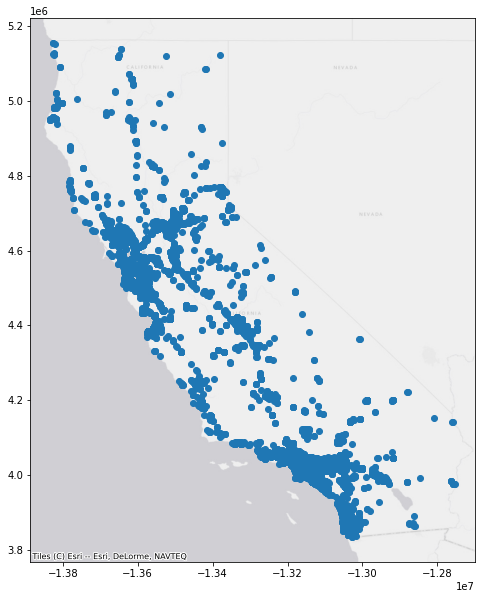

In [ ]:
#there seems to be a couple that aren't in CA so let's remove those
#https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.cx.html#geopandas.GeoDataFrame.cx
#CA bounding box coordinates:
#31, -112
#42, -126
chargers = chargers.cx[-126:-112, 31:42]

#plot again just to check
fig, ax = plt.subplots(figsize=(10,10))
chargers.to_crs("EPSG:3857").plot(ax=ax)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldGrayCanvas)